## Heart Disease

#### Problem Statement
- This task relates to the final model creation aspect of the analysis. The requirement is to build the final model with the highest performance scores. 

### **Introduction**
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [1]:
#Importing The necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize

from sklearn.linear_model  import LogisticRegression

#

In [2]:
 # Read the data set
df =pd.read_csv('heart_disease.csv')

In [3]:
# check the head of the data 
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Demographic: 
- sex: male or female;(Nominal)

- age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
 
 ## **Behavioural**

- currentSmoker: whether or not the patient is a current smoker (Nominal)

- cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

### Medical( history):

- BPMeds: whether or not the patient was on blood pressure medication (Nominal)

- prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

- prevalentHyp: whether or not the patient was hypertensive (Nominal)

- diabetes: whether or not the patient had diabetes (Nominal)

### Medical(current):

- totChol: total cholesterol level (Continuous)

- sysBP: systolic blood pressure (Continuous)

- diaBP: diastolic blood pressure (Continuous)

- BMI: Body Mass Index (Continuous)

- heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

- glucose: glucose level (Continuous)

### **Predict variable (desired target):**

- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [4]:
# Shape of the data set
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.drop(['education'],axis=1,inplace=True)

In [7]:
# Check for Null Values
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

- **Observation** Null values in the data set of the coloumn are very less so drop all the null values

In [8]:
df.dropna(axis=0,inplace=True)

## EDA

In [9]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


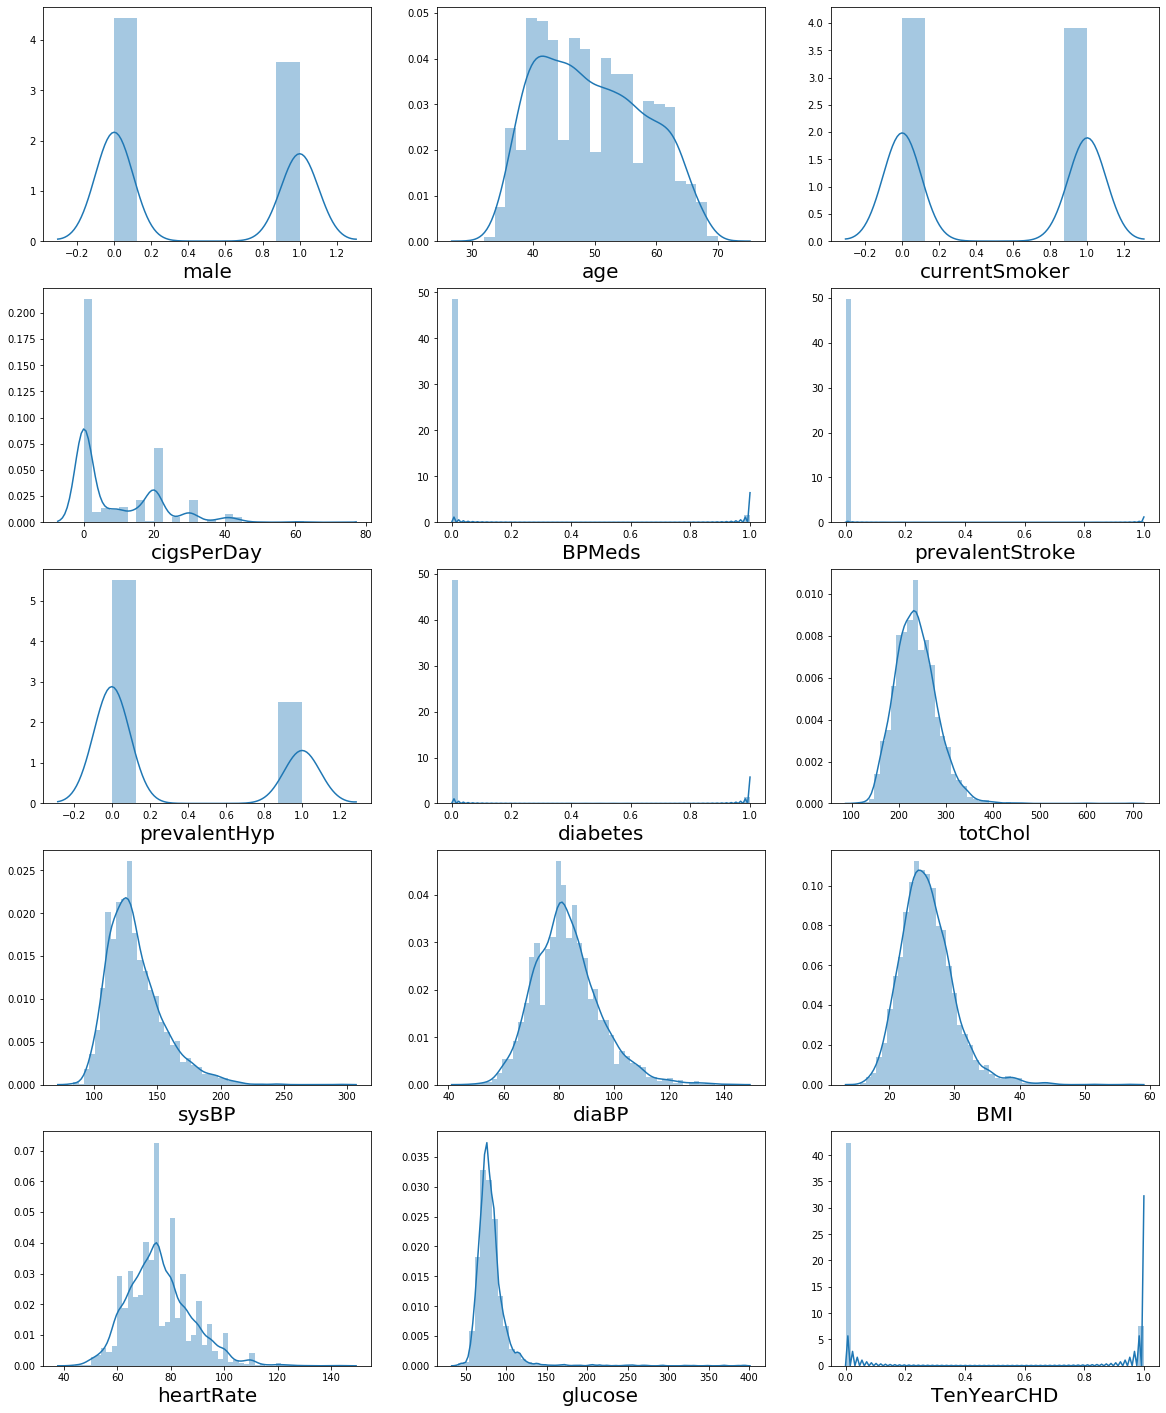

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

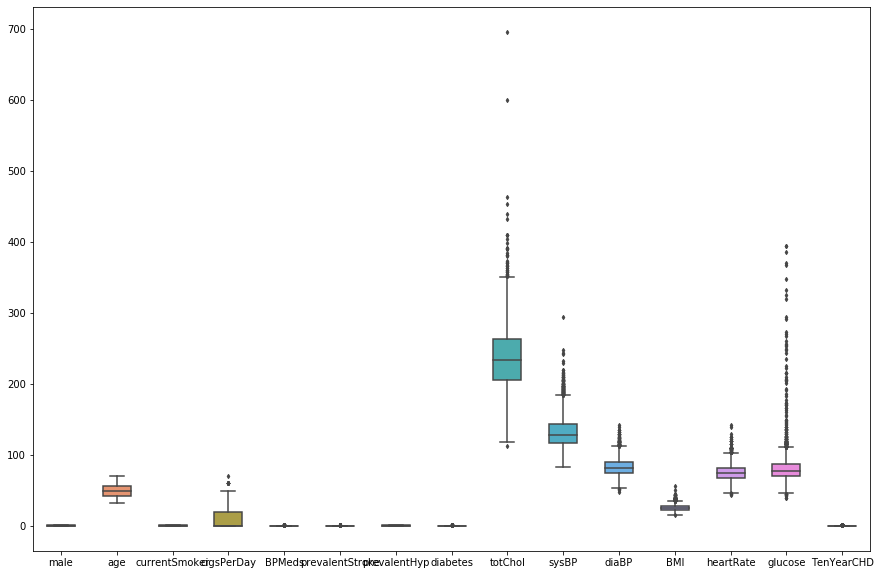

In [11]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [12]:
df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

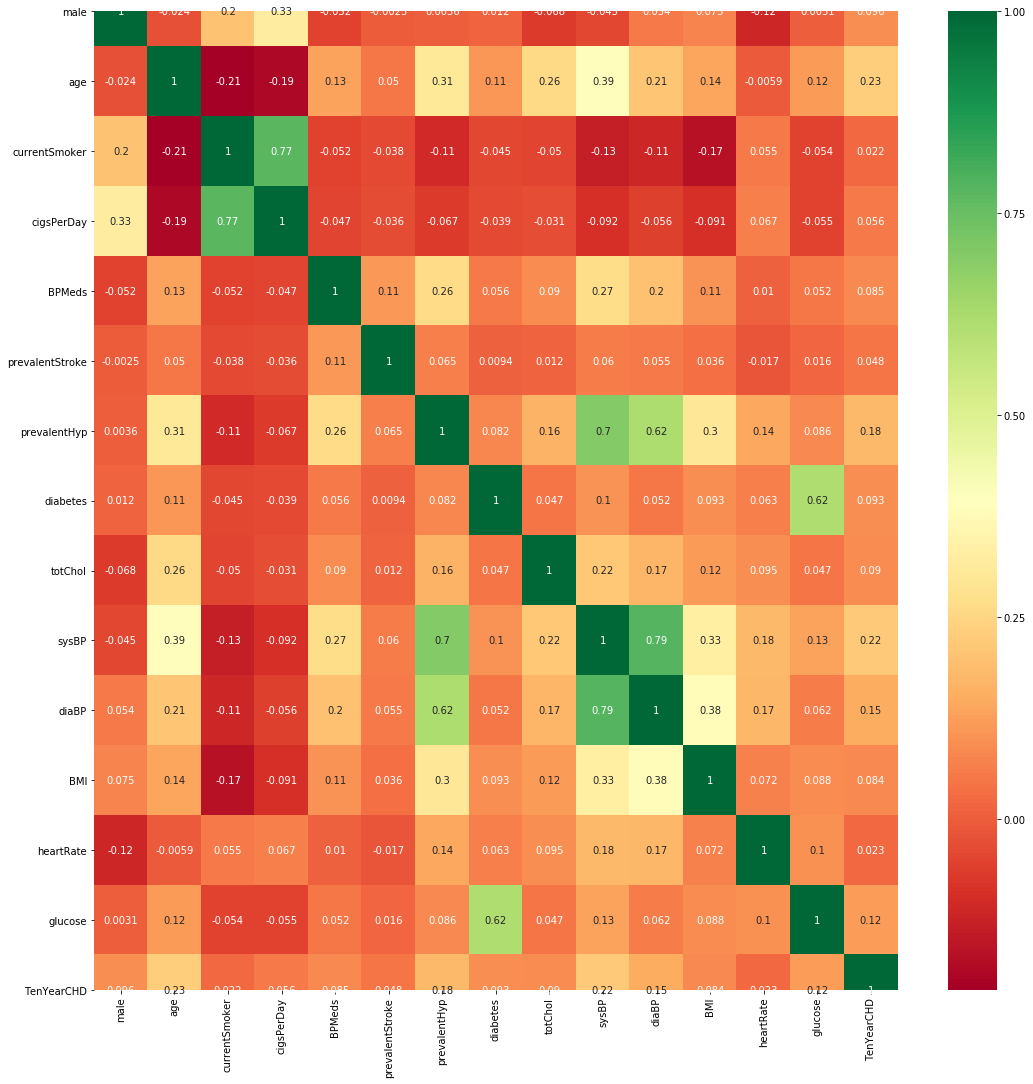

In [13]:
# Finding the correlation of the between independent and dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()


- **Obsevation** 
- Diabetes and glucose are highly corelated ,Need to drop diabetes coloums because the target variale is highly dependent on glucose coloumn
- SysBP, prevalentHyp and dialBP are highly corelated ,Need to drop prevalentHyp and diaBP coloums because the target variale is highly dependent on SysBP coloumn
- Drop all the values less than 0.09


In [14]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
# Drop the coloumns
df.drop(['diabetes','diaBP','prevalentHyp','currentSmoker','BPMeds','prevalentStroke','BMI', 'heartRate'], axis=1, inplace =True)

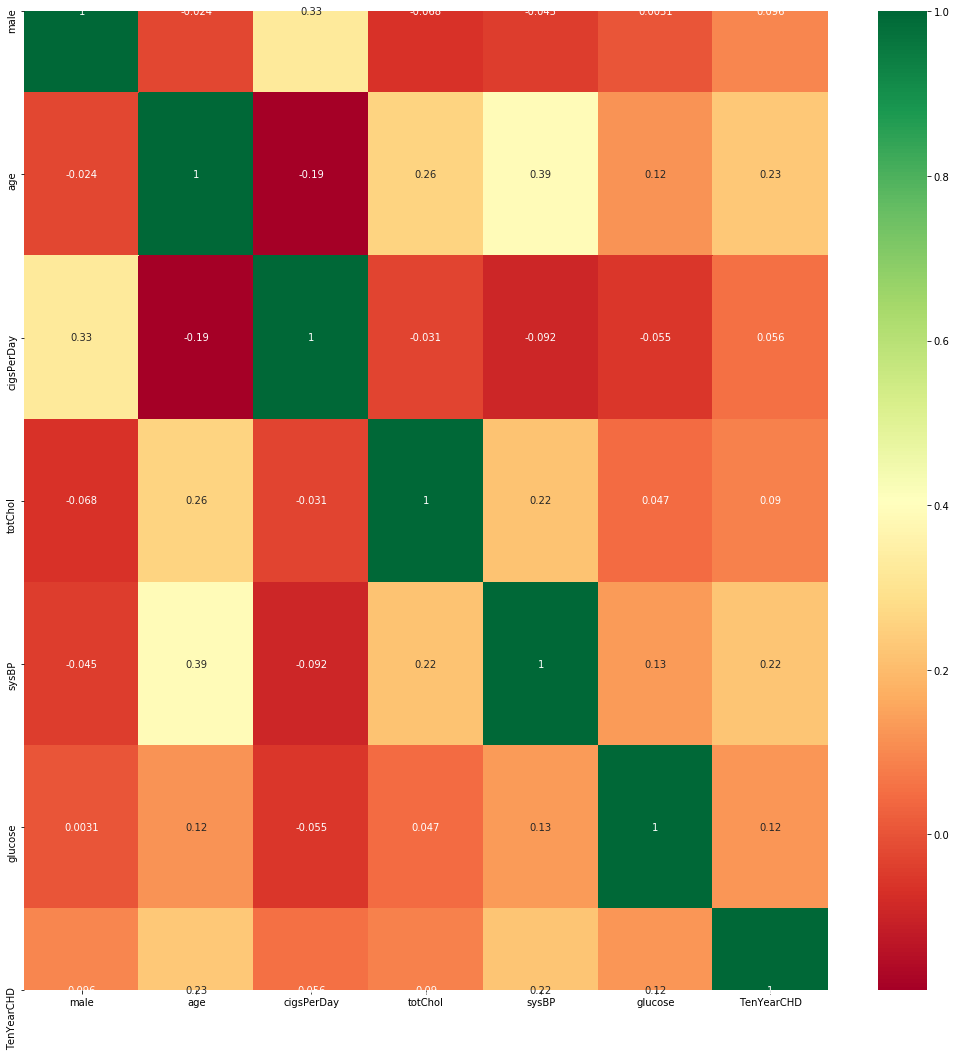

In [16]:
# Finding the correlation of the between independent and dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [17]:
# Using Statics find out the significance of each feature using chi-square 

from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(df)
heart_df_constant.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,1.0,1,39,0.0,195.0,106.0,77.0,0
1,1.0,0,46,0.0,250.0,121.0,76.0,0
2,1.0,1,48,20.0,245.0,127.5,70.0,0
3,1.0,0,61,30.0,225.0,150.0,103.0,1
4,1.0,0,46,23.0,285.0,130.0,85.0,0


In [18]:
import scipy.stats as st
import statsmodels.api as sm
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377958
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 Aug 2020   Pseudo R-squ.:                  0.1149
Time:                        16:52:55   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [19]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,df.TenYearCHD,cols)

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 Aug 2020   Pseudo R-squ.:                  0.1149
Time:                        16:52:56   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 7 columns):
male          3751 non-null int64
age           3751 non-null int64
cigsPerDay    3751 non-null float64
totChol       3751 non-null float64
sysBP         3751 non-null float64
glucose       3751 non-null float64
TenYearCHD    3751 non-null int64
dtypes: float64(4), int64(3)
memory usage: 234.4 KB


In [22]:
df.head()


,male,age,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,77.0,0
1,0,46,0.0,250.0,121.0,76.0,0
2,1,48,20.0,245.0,127.5,70.0,0
3,0,61,30.0,225.0,150.0,103.0,1
4,0,46,23.0,285.0,130.0,85.0,0


In [23]:
# Divide the data into dependent and independent variable
X=df.iloc[:,:-1] # Independent variables
y=df.iloc[:,-1]

In [24]:
X.head()

,male,age,cigsPerDay,totChol,sysBP,glucose
0,1,39,0.0,195.0,106.0,77.0
1,0,46,0.0,250.0,121.0,76.0
2,1,48,20.0,245.0,127.5,70.0
3,0,61,30.0,225.0,150.0,103.0
4,0,46,23.0,285.0,130.0,85.0


In [25]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [26]:
# Standarised the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.127988,male
1,1.270777,age
2,1.165397,cigsPerDay
3,1.097624,totChol
4,1.209386,sysBP
5,1.025008,glucose


### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifier, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier  #Extratree regressor is used for selecting features
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

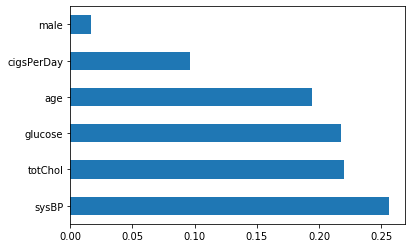

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Model

#### **Logistic_Regression**

In [30]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [31]:
#import Logistic regression model 
from sklearn.linear_model  import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [33]:
#Prediction of train data
pred_log_train = log_reg.predict(X_train)

In [34]:
# Accuracy of train data
accuracy_log_train = accuracy_score(y_train,pred_log_train)
accuracy_log_train

0.846

In [35]:
#Prediction of test data
pred_log_test = log_reg.predict(X_test)

In [36]:
# Accuracy of test data
accuracy_log_test = accuracy_score(y_test,pred_log_test)
accuracy_log_test

0.8748335552596538

## **Metrics**

In [37]:
# Confusion Matrix
conf_mat_log = confusion_matrix(y_test,pred_log_test)
conf_mat_log

array([[652,   7],
       [ 87,   5]], dtype=int64)

In [38]:
true_positive_log = conf_mat_log[0][0]
false_positive_log = conf_mat_log[0][1]
false_negative_log = conf_mat_log[1][0]
true_negative_log = conf_mat_log[1][1]

In [39]:
# Precison log reg
Precision_log = true_positive_log/(true_positive_log+false_positive_log)
# Recall log reg
Recall_log = true_positive_log/(true_positive_log+false_negative_log) 
# F1 Score of log reg
F1_Score_log = 2*(Recall_log * Precision_log) / (Recall_log + Precision_log)
print('Precision_log',Precision_log)
print('Recall_log', Recall_log)
print ('F1_Score_log',F1_Score_log)

Precision_log 0.9893778452200304
Recall_log 0.8822733423545331
F1_Score_log 0.932761087267525


## **Area Under The Curve (AUC)**
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [40]:
# Area Under Curve
auc_log= roc_auc_score(y_test, pred_log_test)
auc_log

0.5218628356534935

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, pred_log_test)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.232


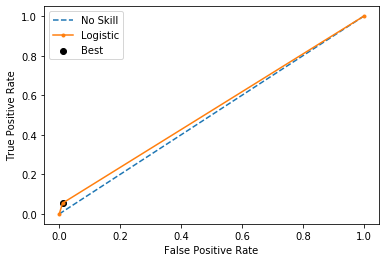

In [42]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [43]:
#Prediction probability of test data
pred_prob_log_test = log_reg.predict_proba(X_test)

In [44]:
from sklearn.preprocessing import binarize

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_log_test[:,1])

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.182374, G-Mean=0.721


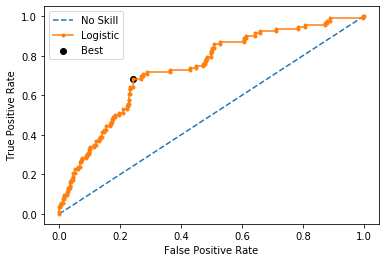

In [46]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [47]:
y_pred2=binarize(pred_prob_log_test,0.182374)[:,1]
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[500, 159],
       [ 29,  63]], dtype=int64)

In [48]:
# Area Under Curve after the thershold value 0.182374
auc_log_prob= roc_auc_score(y_test, y_pred2)
auc_log_prob

0.721753975061028

In [49]:
true_positive_log = cm2[0][0]
false_positive_log = cm2[0][1]
false_negative_log = cm2[1][0]
true_negative_log = cm2[1][1]

In [50]:
# Precison log reg
Precision_log1 = true_positive_log/(true_positive_log+false_positive_log)
# Recall log reg
Recall_log1 = true_positive_log/(true_positive_log+false_negative_log) 
# F1 Score of log reg
F1_Score_log1 = 2*(Recall_log1 * Precision_log1) / (Recall_log1 + Precision_log1)
print('Precision_log',Precision_log1)
print('Recall_log', Recall_log1)
print ('F1_Score_log',F1_Score_log1)

Precision_log 0.7587253414264037
Recall_log 0.945179584120983
F1_Score_log 0.8417508417508417


In [52]:
y_pred3=binarize(pred_prob_log_test,0.5)[:,1]
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

# Area Under Curve after the thershold value 0.5
auc_log1= roc_auc_score(y_test, y_pred3)
print(auc_log1)

[[652   7]
 [ 87   5]]
0.5218628356534935


### **Conclusion**

In [53]:

Parameters={'accuracy_log_train':[accuracy_log_train,accuracy_log_test],
            'accuracy_log_test':[accuracy_log_test,accuracy_log_test],
            'auc_log':[auc_log,auc_log_prob],
            'threshold':[0.5,thresholds[ix]],
           'Precision_log':[Precision_log,Precision_log1],
           'Recall_log':[Recall_log,Recall_log1],
           'F1_Score_log':[F1_Score_log,F1_Score_log1]}

In [54]:
AllParameters=pd.DataFrame(Parameters)
AllParameters

,accuracy_log_train,accuracy_log_test,auc_log,threshold,Precision_log,Recall_log,F1_Score_log
0,0.846000,0.874834,0.521863,0.500000,0.989378,0.882273,0.932761
1,0.874834,0.874834,0.721754,0.182374,0.758725,0.945180,0.841751
